# Analyzing Economic Indicators and Home Price Index

## Data Pre-processing and Preparation

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

GDP Data

In [140]:
gdp = pd.read_csv('GDP.csv')

In [141]:
gdp.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [142]:
gdp['DATE'] = pd.to_datetime(gdp['DATE'])
gdp['YEAR'] = gdp['DATE'].dt.year
gdp['MONTH'] = gdp['DATE'].dt.month
gdp = gdp[['YEAR', 'MONTH', 'GDP']]

In [143]:
def expandquarterly_to_monthly(quarterly_data):
    monthly_data = []
    for _, row in quarterly_data.iterrows():
        year = int(row['YEAR'])
        start_month = int(row['MONTH'])
        gdp = row['GDP']
    
        for i in range(3):
            monthly_data.append({'YEAR': year, 'MONTH': start_month + i, 'GDP': gdp})

    return pd.DataFrame(monthly_data)

In [144]:
gdp = expandquarterly_to_monthly(gdp)

In [145]:
gdp.head()

,YEAR,MONTH,GDP
0,1947,1,243.164
1,1947,2,243.164
2,1947,3,243.164
3,1947,4,245.968
4,1947,5,245.968


In [146]:
row_number_start = gdp.loc[gdp['YEAR'] == 2002].index[0]
row_number_end = gdp.loc[gdp['YEAR'] == 2022].index[0] + 12
gdp = gdp.iloc[row_number_start:row_number_end][:]
gdp.reset_index(inplace=True, drop=True)

In [147]:
gdp.head()


,YEAR,MONTH,GDP
0,2002,1,10783.50
1,2002,2,10783.50
2,2002,3,10783.50
3,2002,4,10887.46
4,2002,5,10887.46


In [148]:
gdp.tail()

,YEAR,MONTH,GDP
247,2022,8,25994.639
248,2022,9,25994.639
249,2022,10,26408.405
250,2022,11,26408.405
251,2022,12,26408.405


In [149]:
gdp.shape

(252, 3)

Mortgage Rate Data

In [150]:
mortgage = pd.read_csv('Mortgage.csv')

In [151]:
mortgage.head()

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [152]:
mortgage['DATE'] = pd.to_datetime(mortgage['DATE'])
mortgage['YEAR'] = mortgage['DATE'].dt.year
mortgage['MONTH'] = mortgage['DATE'].dt.month
mortgage = mortgage[['YEAR', 'MONTH', 'MORTGAGE30US']]

In [153]:
mortgage.head()

,YEAR,MONTH,MORTGAGE30US
0,1971,4,7.33
1,1971,4,7.31
2,1971,4,7.31
3,1971,4,7.31
4,1971,4,7.29


In [154]:
mortgage = mortgage.groupby(['YEAR', 'MONTH'], as_index=False)['MORTGAGE30US'].mean()

In [155]:
mortgage.head()

,YEAR,MONTH,MORTGAGE30US
0,1971,4,7.3100
1,1971,5,7.4250
2,1971,6,7.5300
3,1971,7,7.6040
4,1971,8,7.6975


In [156]:
row_number_start = mortgage.loc[mortgage['YEAR'] == 2002].index[0]
row_number_end = mortgage.loc[mortgage['YEAR'] == 2023].index[0] - 1
mortgage = mortgage.iloc[row_number_start:row_number_end+1][:]
mortgage.reset_index(inplace=True, drop=True)

In [157]:
mortgage.head()

,YEAR,MONTH,MORTGAGE30US
0,2002,1,6.9975
1,2002,2,6.8925
2,2002,3,7.0140
3,2002,4,6.9850
4,2002,5,6.8060


In [158]:
mortgage.tail()

,YEAR,MONTH,MORTGAGE30US
247,2022,8,5.2225
248,2022,9,6.1120
249,2022,10,6.9000
250,2022,11,6.8050
251,2022,12,6.3640


In [159]:
mortgage.shape

(252, 3)

Population Growth

In [160]:
population_growth = pd.read_csv('Population-Growth.csv')

In [161]:
population_growth.head()

,DATE,SPPOPGROWUSA
0,1961-01-01,1.657730
1,1962-01-01,1.537997
2,1963-01-01,1.439165
3,1964-01-01,1.389046
4,1965-01-01,1.250172


In [162]:
population_growth['DATE'] = pd.to_datetime(population_growth['DATE'])
population_growth['YEAR'] = population_growth['DATE'].dt.year
population_growth['MONTH'] = population_growth['DATE'].dt.month
population_growth = population_growth[['YEAR', 'MONTH', 'SPPOPGROWUSA']]

In [163]:
population_growth.head()

,YEAR,MONTH,SPPOPGROWUSA
0,1961,1,1.657730
1,1962,1,1.537997
2,1963,1,1.439165
3,1964,1,1.389046
4,1965,1,1.250172


In [164]:
def yearly_to_monthly(yearly_data):
    monthly_data = []
    for _, row in yearly_data.iterrows():
        year = int(row['YEAR'])
        start_month = int(row['MONTH'])
        mortgage = row['SPPOPGROWUSA']

        for i in range(12):
            monthly_data.append({'YEAR': year, 'MONTH': start_month+i, 'SPPOPGROWUSA': mortgage})

    return pd.DataFrame(monthly_data)

In [165]:
population_growth = yearly_to_monthly(population_growth)

In [166]:
population_growth.head()

,YEAR,MONTH,SPPOPGROWUSA
0,1961,1,1.65773
1,1961,2,1.65773
2,1961,3,1.65773
3,1961,4,1.65773
4,1961,5,1.65773


In [167]:
row_number_start = population_growth.loc[population_growth['YEAR'] == 2002].index[0]
row_number_end = population_growth.loc[population_growth['YEAR'] == 2022].index[0] + 12
population_growth = population_growth.iloc[row_number_start:row_number_end][:]
population_growth.reset_index(inplace=True, drop=True)

In [168]:
population_growth.head()

,YEAR,MONTH,SPPOPGROWUSA
0,2002,1,0.927797
1,2002,2,0.927797
2,2002,3,0.927797
3,2002,4,0.927797
4,2002,5,0.927797


In [169]:
population_growth.tail()

,YEAR,MONTH,SPPOPGROWUSA
247,2022,8,0.377565
248,2022,9,0.377565
249,2022,10,0.377565
250,2022,11,0.377565
251,2022,12,0.377565


In [170]:
population_growth.shape

(252, 3)

Remaining Factors

We'll have common preprocessing for them as they are according to desired structure

In [171]:
consumer_price_index = pd.read_csv('Consumer-Price-Index.csv')
fed_funds = pd.read_csv('FedFunds.csv')
home_price_index = pd.read_csv('Home-Price-Index.csv')
unemployment_rate = pd.read_csv('Unemployment-Rate.csv')

In [172]:
def preprocess(df, value_name):
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['YEAR'] = df['DATE'].dt.year
    df['MONTH'] = df['DATE'].dt.month

    df = df[['YEAR', 'MONTH', value_name]]

    row_number_start = df.loc[df['YEAR'] == 2002].index[0]
    row_number_end = df.loc[df['YEAR'] == 2022].index[0] + 12

    df = df.iloc[row_number_start:row_number_end][:]

    df.reset_index(inplace=True, drop=True)

    return df

In [173]:
consumer_price_index = preprocess(consumer_price_index, 'CPIAUCSL')
fed_funds = preprocess(fed_funds, 'FEDFUNDS')
home_price_index = preprocess(home_price_index, 'CSUSHPISA')
unemployment_rate = preprocess(unemployment_rate, 'UNRATE')

In [174]:
print(consumer_price_index.shape)
print(fed_funds.shape)
print(home_price_index.shape)
print(unemployment_rate.shape)

(252, 3)
(252, 3)
(252, 3)
(252, 3)


## Merge the data from various factors

In [175]:
data = pd.merge(gdp, mortgage, on=['YEAR', 'MONTH'])
data = pd.merge(data, population_growth, on=['YEAR', 'MONTH'])
data = pd.merge(data, consumer_price_index, on=['YEAR', 'MONTH'])
data = pd.merge(data, fed_funds, on=['YEAR', 'MONTH'])
data = pd.merge(data, unemployment_rate, on=['YEAR', 'MONTH'])
data = pd.merge(data, home_price_index, on=['YEAR', 'MONTH'])

In [176]:
data.head()

,YEAR,MONTH,GDP,MORTGAGE30US,SPPOPGROWUSA,CPIAUCSL,FEDFUNDS,UNRATE,CSUSHPISA
0,2002,1,10783.50,6.9975,0.927797,177.7,1.73,5.7,117.143
1,2002,2,10783.50,6.8925,0.927797,178.0,1.74,5.7,117.845
2,2002,3,10783.50,7.0140,0.927797,178.5,1.73,5.7,118.687
3,2002,4,10887.46,6.9850,0.927797,179.3,1.75,5.9,119.611
4,2002,5,10887.46,6.8060,0.927797,179.5,1.75,5.8,120.724


In [177]:
data.to_csv('processed_data.csv', index=False)

# Data Visualization

GDP vs Home Price Index

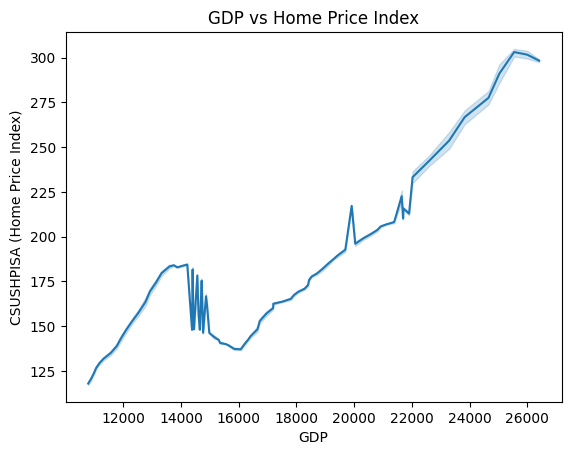

In [178]:
sns.lineplot(x='GDP', y='CSUSHPISA', data=data)
plt.xlabel('GDP')
plt.ylabel('CSUSHPISA (Home Price Index)')
plt.title('GDP vs Home Price Index')
plt.show()

Mortgage vs Home Price Index

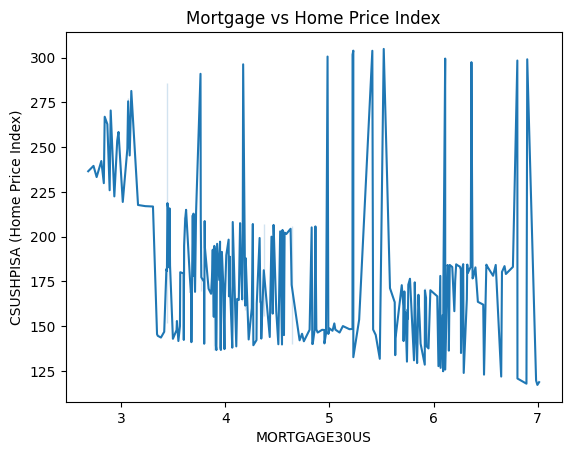

In [179]:
sns.lineplot(x='MORTGAGE30US', y='CSUSHPISA', data=data)
plt.xlabel('MORTGAGE30US')
plt.ylabel('CSUSHPISA (Home Price Index)')
plt.title('Mortgage vs Home Price Index')
plt.show()

Population Growth vs Home Price Index

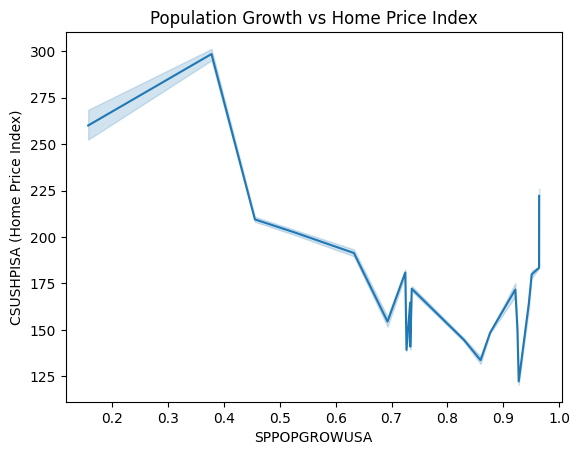

In [180]:
sns.lineplot(x='SPPOPGROWUSA', y='CSUSHPISA', data=data)
plt.xlabel('SPPOPGROWUSA')
plt.ylabel('CSUSHPISA (Home Price Index)')
plt.title('Population Growth vs Home Price Index')
plt.show()

Consumer Price Index vs Home Price Index

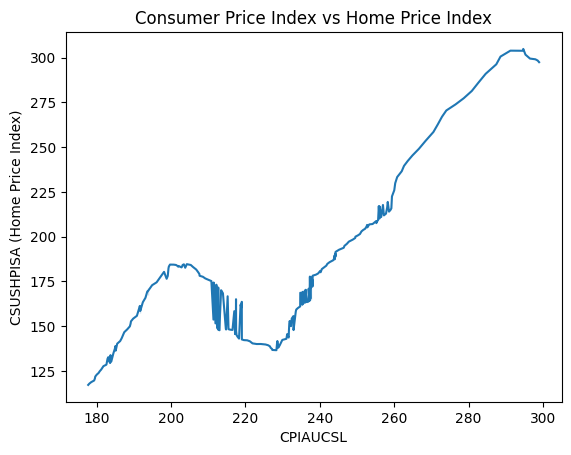

In [181]:
sns.lineplot(x='CPIAUCSL', y='CSUSHPISA', data=data)
plt.xlabel('CPIAUCSL')
plt.ylabel('CSUSHPISA (Home Price Index)')
plt.title('Consumer Price Index vs Home Price Index')
plt.show()

Federal Funds vs Home Price Index

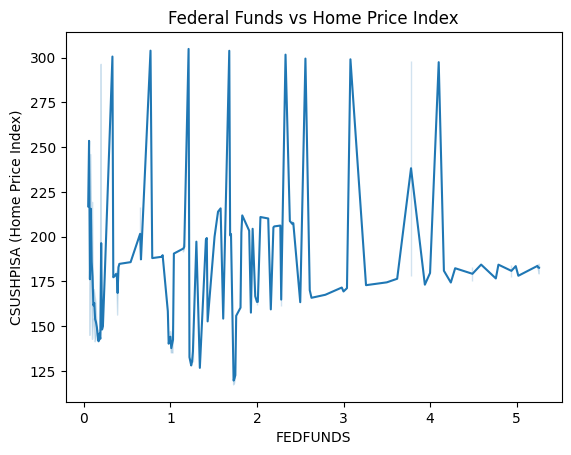

In [182]:
sns.lineplot(x='FEDFUNDS', y='CSUSHPISA', data=data)
plt.xlabel('FEDFUNDS')
plt.ylabel('CSUSHPISA (Home Price Index)')
plt.title('Federal Funds vs Home Price Index')
plt.show()

Unemployment Rate vs Home Price Index

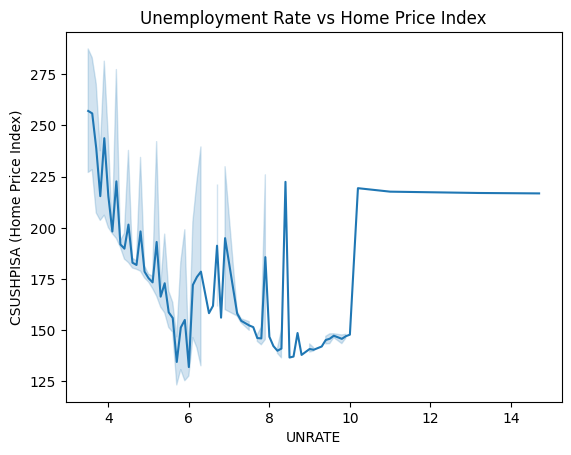

In [183]:
sns.lineplot(x='UNRATE', y='CSUSHPISA', data=data)
plt.xlabel('UNRATE')
plt.ylabel('CSUSHPISA (Home Price Index)')
plt.title('Unemployment Rate vs Home Price Index')
plt.show()

Home Price Index by Year

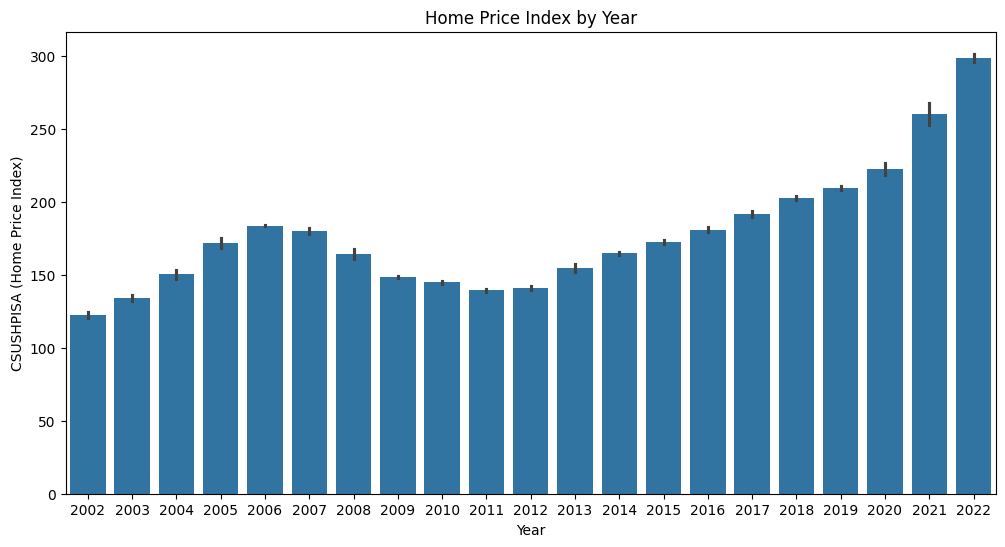

In [184]:
plt.figure(figsize=(12, 6))

sns.barplot(x='YEAR', y='CSUSHPISA', data=data)
plt.xlabel('Year')
plt.ylabel('CSUSHPISA (Home Price Index)')
plt.title('Home Price Index by Year')

plt.show()

# Time Series Visualization

GDP over 20 Years

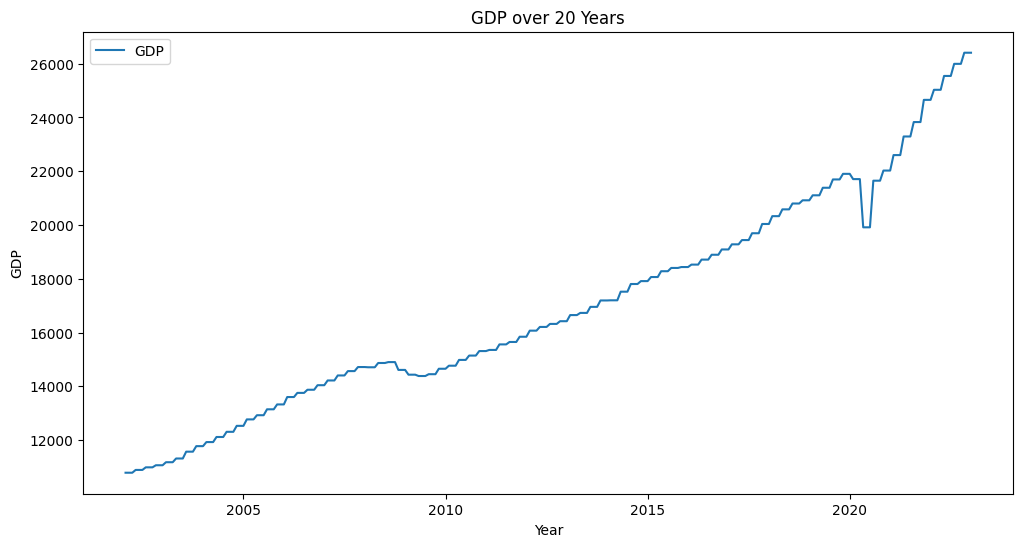

In [185]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(data['YEAR'] + data['MONTH'] / 12, data['GDP'], label='GDP')

ax.set_xlabel('Year')

ax.set_ylabel('GDP')

ax.set_title('GDP over 20 Years')

ax.legend()

plt.show()

Mortgage Rate over 20 Years

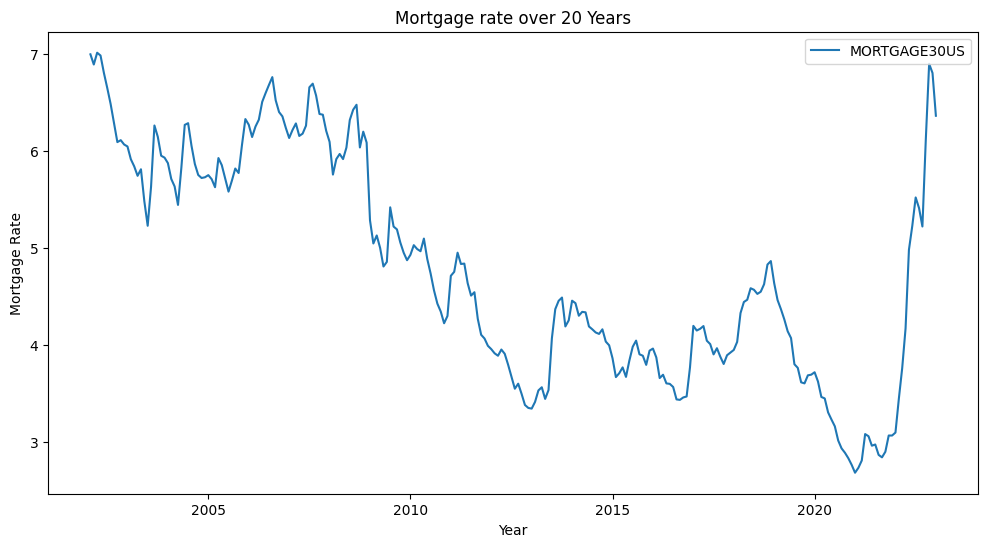

In [186]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(data['YEAR'] + data['MONTH'] / 12, data['MORTGAGE30US'], label='MORTGAGE30US')

ax.set_xlabel('Year')

ax.set_ylabel('Mortgage Rate')

ax.set_title('Mortgage rate over 20 Years')

ax.legend()

plt.show()

Population Growth over 20 Years

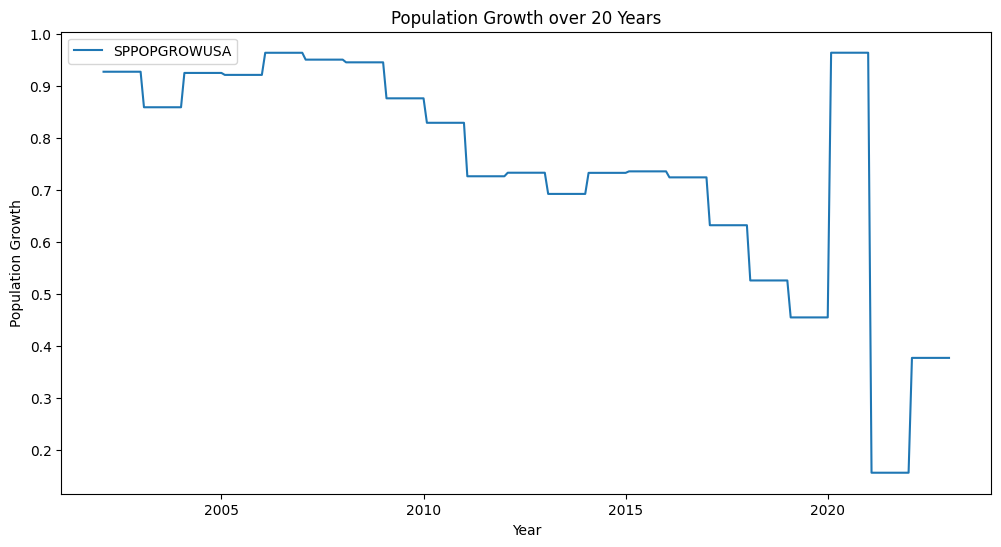

In [187]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(data['YEAR'] + data['MONTH'] / 12, data['SPPOPGROWUSA'], label='SPPOPGROWUSA')

ax.set_xlabel('Year')

ax.set_ylabel('Population Growth')

ax.set_title('Population Growth over 20 Years')

ax.legend()

plt.show()

Consumer Price Index over 20 Years

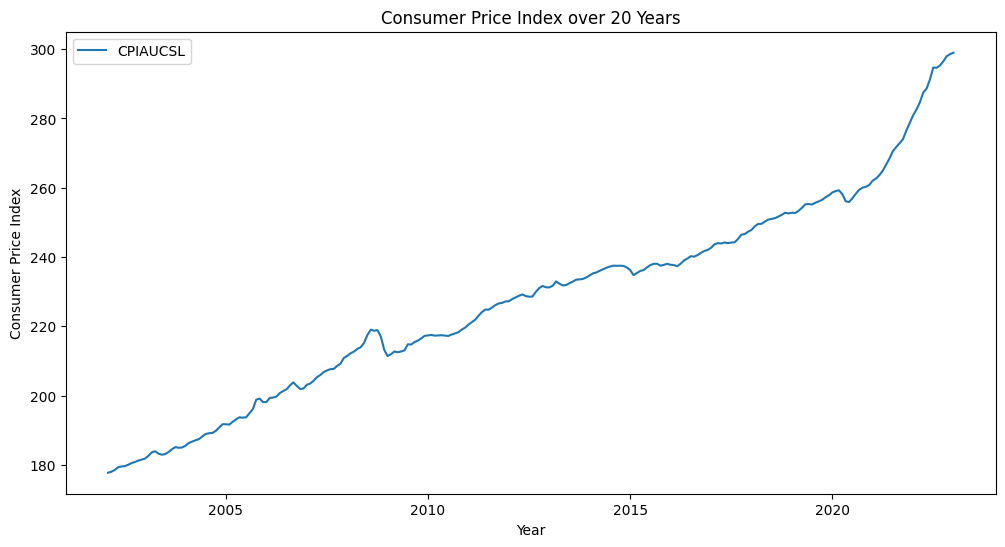

In [188]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(data['YEAR'] + data['MONTH'] / 12, data['CPIAUCSL'], label='CPIAUCSL')

ax.set_xlabel('Year')

ax.set_ylabel('Consumer Price Index')

ax.set_title('Consumer Price Index over 20 Years')

ax.legend()

plt.show()

Federal Funds over 20 Years

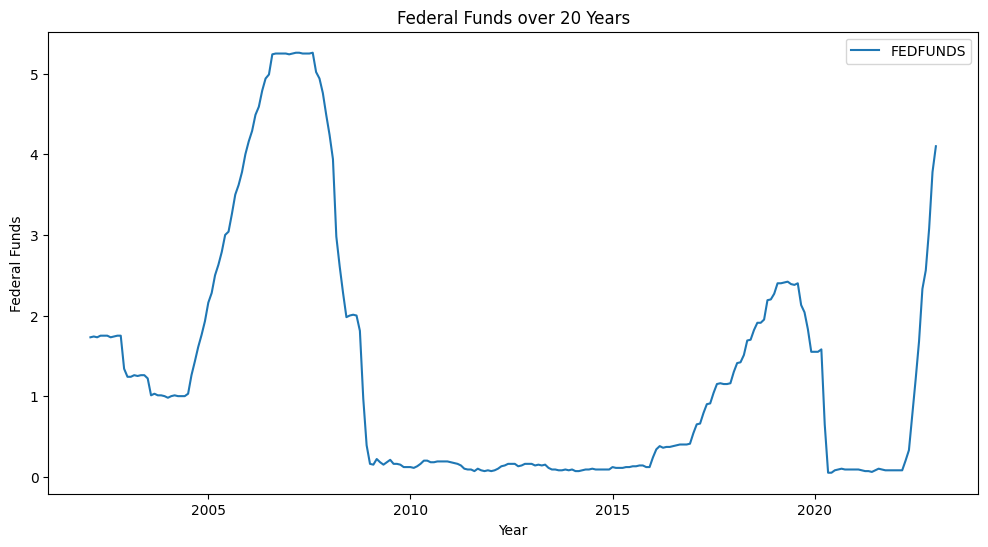

In [189]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(data['YEAR'] + data['MONTH'] / 12, data['FEDFUNDS'], label='FEDFUNDS')

ax.set_xlabel('Year')

ax.set_ylabel('Federal Funds')

ax.set_title('Federal Funds over 20 Years')

ax.legend()

plt.show()

Unemployment Rate over 20 Years

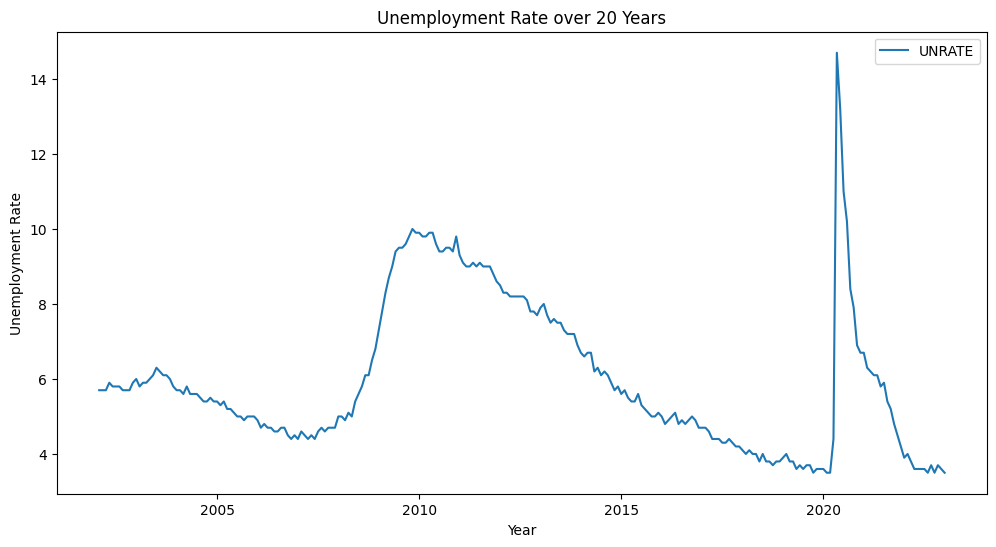

In [190]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(data['YEAR'] + data['MONTH'] / 12, data['UNRATE'], label='UNRATE')

ax.set_xlabel('Year')

ax.set_ylabel('Unemployment Rate')

ax.set_title('Unemployment Rate over 20 Years')

ax.legend()

plt.show()

Home Price Index over 20 Years

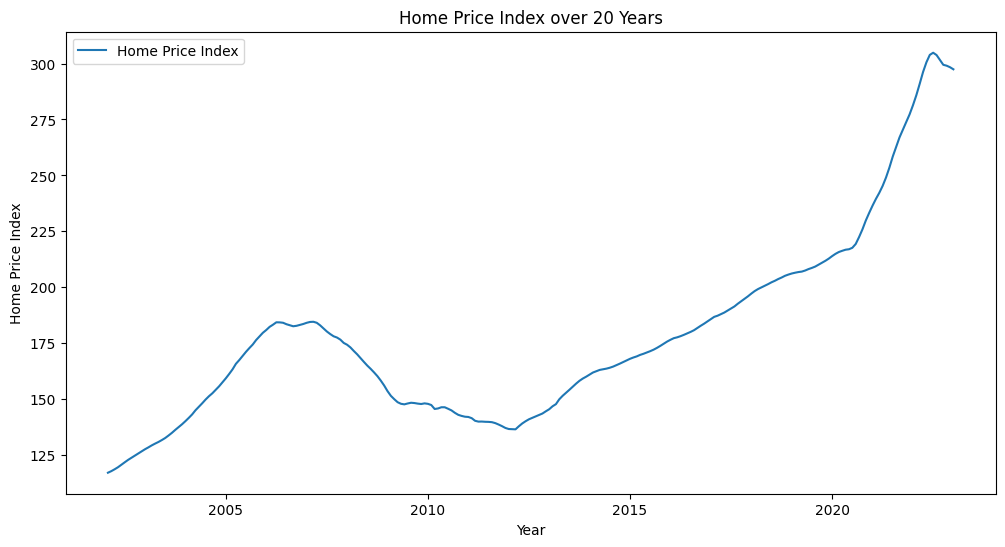

In [191]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(data['YEAR'] + data['MONTH'] / 12, data['CSUSHPISA'], label='Home Price Index')

ax.set_xlabel('Year')

ax.set_ylabel('Home Price Index')

ax.set_title('Home Price Index over 20 Years')

ax.legend()

plt.show()

# Factors and Home Price Index

GDP and Case-Schiller Home Price Index over Years

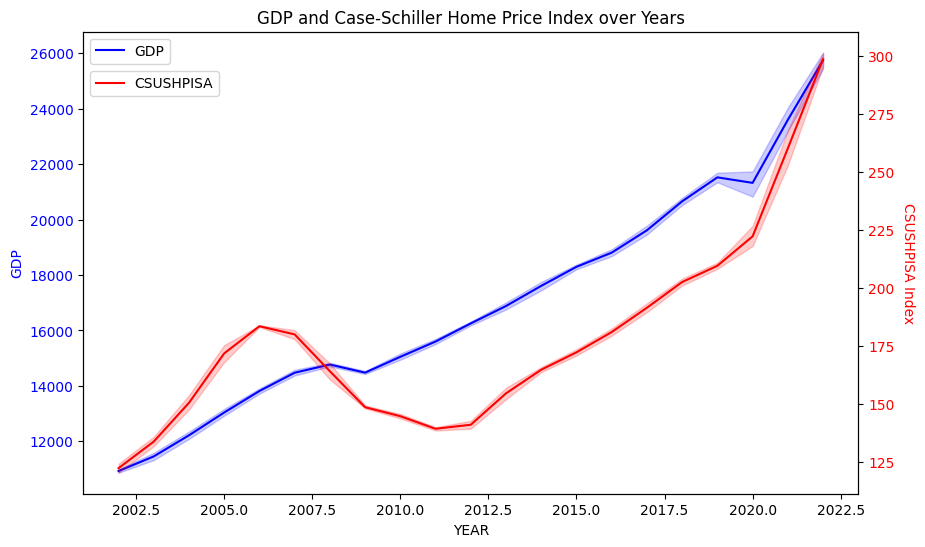

In [192]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=data, x='YEAR', y='GDP', ax=ax1, color='b', label='GDP')
ax1.set_ylabel('GDP', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
sns.lineplot(data=data, x='YEAR', y='CSUSHPISA', ax=ax2, color='r', label='CSUSHPISA')
ax2.set_ylabel('CSUSHPISA Index', color='r', rotation=270, labelpad=15)
ax2.tick_params(axis='y', labelcolor='r')

plt.legend(loc='upper left', bbox_to_anchor=(0.0, 0.93))

plt.title('GDP and Case-Schiller Home Price Index over Years')

plt.show()

Mortgage and Case-Schiller Home Price Index over Years

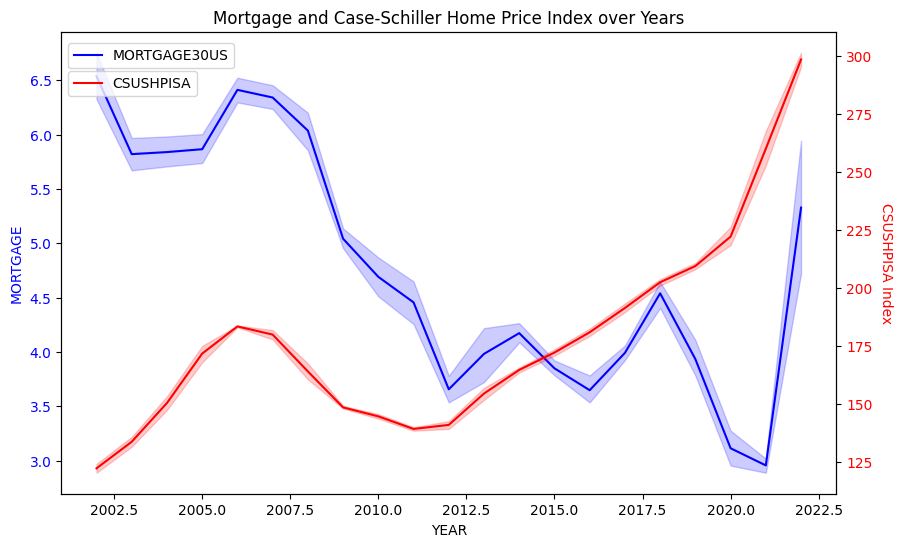

In [217]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=data, x='YEAR', y='MORTGAGE30US', ax=ax1, color='b', label='MORTGAGE30US')
ax1.set_ylabel('MORTGAGE', color='b')
ax1.tick_params(axis='y', labelcolor='b')

plt.legend(loc='upper left', bbox_to_anchor=(0.0, 0.99))

ax2 = ax1.twinx()
sns.lineplot(data=data, x='YEAR', y='CSUSHPISA', ax=ax2, color='r', label='CSUSHPISA')
ax2.set_ylabel('CSUSHPISA Index', color='r', rotation=270, labelpad=15)
ax2.tick_params(axis='y', labelcolor='r')

plt.legend(loc='upper left', bbox_to_anchor=(0.0, 0.93))

plt.title('Mortgage and Case-Schiller Home Price Index over Years')

plt.show()

Population Growth and Case-Schiller Home Price Index over Years

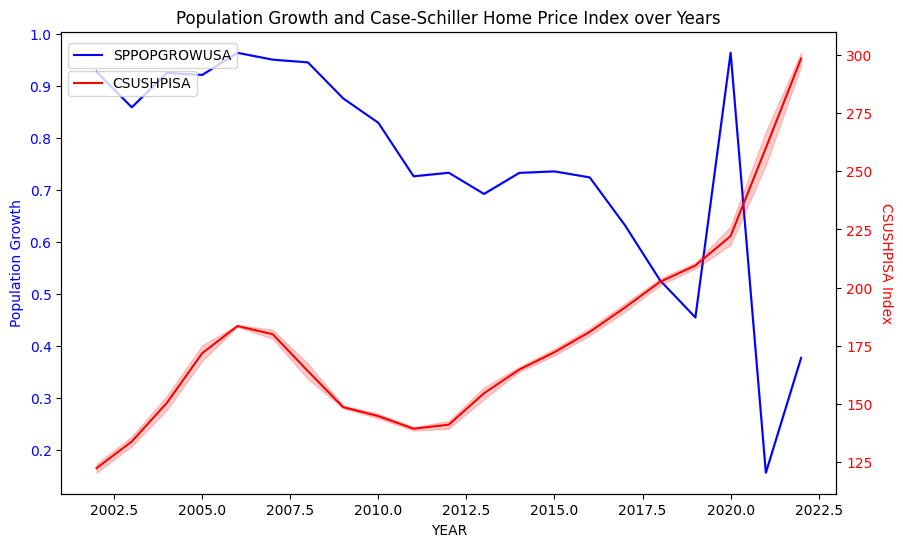

In [218]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=data, x='YEAR', y='SPPOPGROWUSA', ax=ax1, color='b', label='SPPOPGROWUSA')
ax1.set_ylabel('Population Growth', color='b')
ax1.tick_params(axis='y', labelcolor='b')

plt.legend(loc='upper left', bbox_to_anchor=(0.0, 0.99))

ax2 = ax1.twinx()
sns.lineplot(data=data, x='YEAR', y='CSUSHPISA', ax=ax2, color='r', label='CSUSHPISA')
ax2.set_ylabel('CSUSHPISA Index', color='r', rotation=270, labelpad=15)
ax2.tick_params(axis='y', labelcolor='r')

plt.legend(loc='upper left', bbox_to_anchor=(0.0, 0.93))

plt.title('Population Growth and Case-Schiller Home Price Index over Years')

plt.show()

Consumer Price Index and Case-Schiller Home Price Index over Years

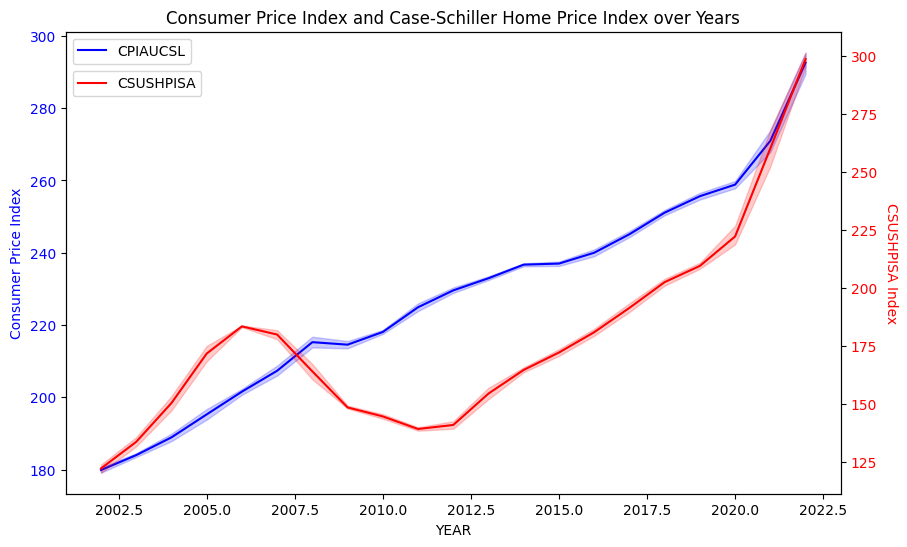

In [195]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=data, x='YEAR', y='CPIAUCSL', ax=ax1, color='b', label='CPIAUCSL')
ax1.set_ylabel('Consumer Price Index', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
sns.lineplot(data=data, x='YEAR', y='CSUSHPISA', ax=ax2, color='r', label='CSUSHPISA')
ax2.set_ylabel('CSUSHPISA Index', color='r', rotation=270, labelpad=15)
ax2.tick_params(axis='y', labelcolor='r')

plt.legend(loc='upper left', bbox_to_anchor=(0.0, 0.93))

plt.title('Consumer Price Index and Case-Schiller Home Price Index over Years')

plt.show()

Federal Funds and Case-Schiller Home Price Index over Years

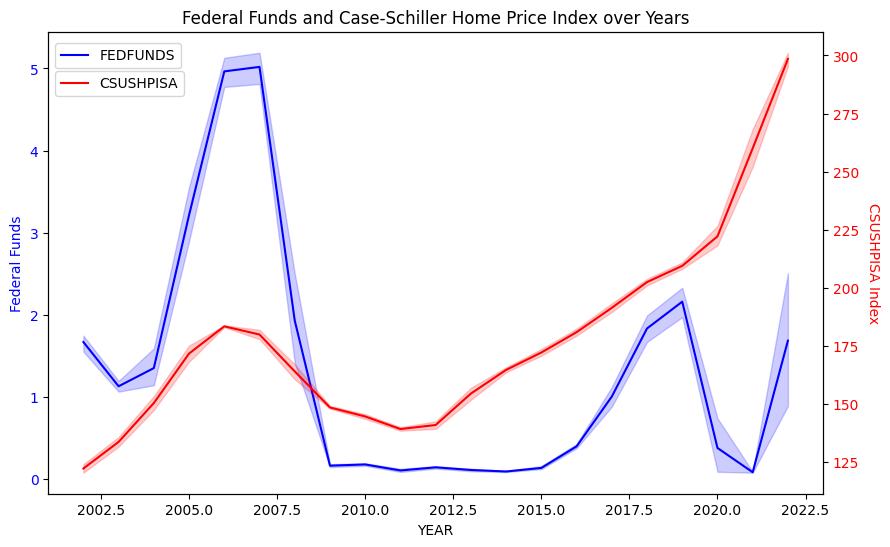

In [219]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=data, x='YEAR', y='FEDFUNDS', ax=ax1, color='b', label='FEDFUNDS')
ax1.set_ylabel('Federal Funds', color='b')
ax1.tick_params(axis='y', labelcolor='b')

plt.legend(loc='upper left', bbox_to_anchor=(0.0, 0.99))

ax2 = ax1.twinx()
sns.lineplot(data=data, x='YEAR', y='CSUSHPISA', ax=ax2, color='r', label='CSUSHPISA')
ax2.set_ylabel('CSUSHPISA Index', color='r', rotation=270, labelpad=15)
ax2.tick_params(axis='y', labelcolor='r')

plt.legend(loc='upper left', bbox_to_anchor=(0.0, 0.93))

plt.title('Federal Funds and Case-Schiller Home Price Index over Years')

plt.show()

Unemployment Rate and Case-Schiller Home Price Index over Years

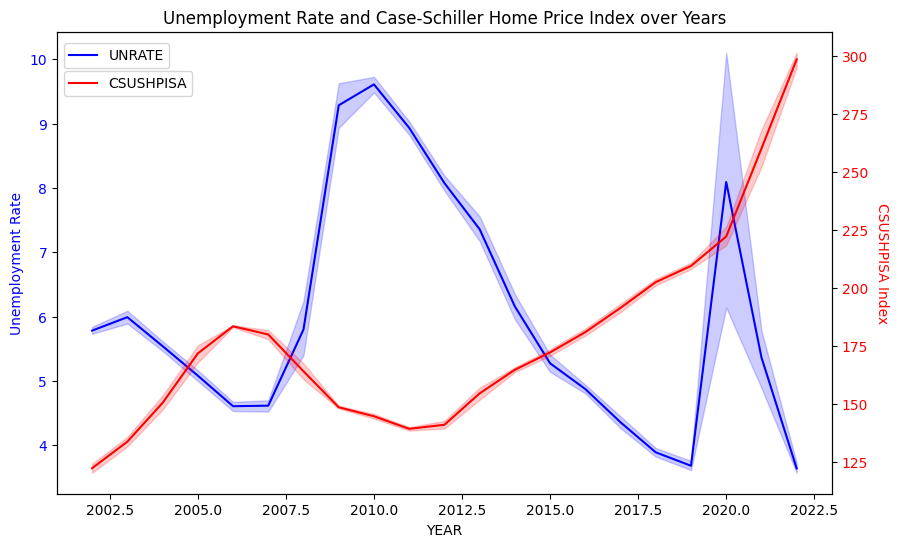

In [220]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=data, x='YEAR', y='UNRATE', ax=ax1, color='b', label='UNRATE')
ax1.set_ylabel('Unemployment Rate', color='b')
ax1.tick_params(axis='y', labelcolor='b')

plt.legend(loc='upper left', bbox_to_anchor=(0.0, 0.99))

ax2 = ax1.twinx()
sns.lineplot(data=data, x='YEAR', y='CSUSHPISA', ax=ax2, color='r', label='CSUSHPISA')
ax2.set_ylabel('CSUSHPISA Index', color='r', rotation=270, labelpad=15)
ax2.tick_params(axis='y', labelcolor='r')

plt.legend(loc='upper left', bbox_to_anchor=(0.0, 0.93))

plt.title('Unemployment Rate and Case-Schiller Home Price Index over Years')

plt.show()

# Data Overview and Model Training

## Data overview

In [198]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YEAR          252 non-null    int64  
 1   MONTH         252 non-null    int64  
 2   GDP           252 non-null    float64
 3   MORTGAGE30US  252 non-null    float64
 4   SPPOPGROWUSA  252 non-null    float64
 5   CPIAUCSL      252 non-null    float64
 6   FEDFUNDS      252 non-null    float64
 7   UNRATE        252 non-null    float64
 8   CSUSHPISA     252 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 17.8 KB


,YEAR,MONTH,GDP,MORTGAGE30US,SPPOPGROWUSA,CPIAUCSL,FEDFUNDS,UNRATE,CSUSHPISA
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,2012.000000,6.500000,16958.200821,4.771565,0.745835,227.634710,1.319008,6.001190,177.878694
std,6.067351,3.458922,3954.702002,1.156718,0.212320,28.868851,1.542732,1.985615,42.149706
min,2002.000000,1.000000,10783.500000,2.684000,0.156747,177.700000,0.050000,3.500000,117.143000
25%,2007.000000,3.750000,14339.839750,3.858000,0.692860,205.750000,0.120000,4.600000,146.768500
50%,2012.000000,6.500000,16263.328000,4.536250,0.736217,228.997000,0.715000,5.550000,170.175500
75%,2017.000000,9.250000,19747.732000,5.869625,0.925484,246.482750,1.935000,7.200000,194.025000
max,2022.000000,12.000000,26408.405000,7.014000,0.964348,298.990000,5.260000,14.700000,304.832000


## Training an XGBoost model to predict Home Price Index

In [199]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [200]:
X = data.drop(columns=['CSUSHPISA', 'MONTH', 'YEAR'])
y = data['CSUSHPISA']

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=20)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [203]:
y_pred = model.predict(X_test)

In [204]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 1.7934017066096433
R-squared: 0.9973871779350381


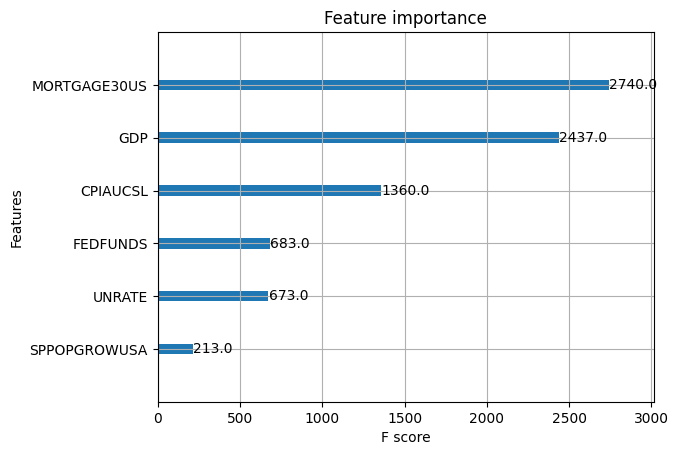

In [205]:
xgb.plot_importance(model)
plt.show()

Checking the predicted vs the actual data

In [206]:
checkPredictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
checkPredictions.head()

,Actual,Predicted
165,174.792,176.278046
6,122.888,123.767548
111,140.010,139.172668
172,179.430,180.316086
115,139.309,139.143372


## Creating Model file

In [207]:
import pickle
with open('dataScienceModel.pkl', 'wb') as file:
    pickle.dump(model, file)

